# Using the Models

In [1]:
from ReflectX import *

## Loading a full model

The most basic model is for one planet type, star type, and C/O ratio.  This function loads every spectrum for that system, stored as a dictionary of XArrays. Example: load every spectrum for a Saturn-like planet at sub-solar C/O around an M dwarf star:

In [3]:
path = '/Volumes/Oy/' # Path to the location of the "ReflectX" folder:
Teff = 3500
planet = 'Saturn'
CtoO = 0.5
system_model = LoadModel(path, Teff, planet, CtoO)

In [4]:
system_model.keys()

dict_keys(['teq75/phase0/cloudfree', 'teq75/phase0/fsed01/kzz1e+09', 'teq75/phase0/fsed01/kzz1e+11', 'teq75/phase0/fsed05/kzz1e+09', 'teq75/phase0/fsed05/kzz1e+11', 'teq75/phase0/fsed1/kzz1e+09', 'teq75/phase0/fsed1/kzz1e+11', 'teq75/phase0/fsed3/kzz1e+09', 'teq75/phase0/fsed3/kzz1e+11', 'teq75/phase0/fsed6/kzz1e+09', 'teq75/phase0/fsed6/kzz1e+11', 'teq75/phase0/fsed10/kzz1e+09', 'teq75/phase0/fsed10/kzz1e+11', 'teq75/phase45/cloudfree', 'teq75/phase45/fsed01/kzz1e+09', 'teq75/phase45/fsed01/kzz1e+11', 'teq75/phase45/fsed05/kzz1e+09', 'teq75/phase45/fsed05/kzz1e+11', 'teq75/phase45/fsed1/kzz1e+09', 'teq75/phase45/fsed1/kzz1e+11', 'teq75/phase45/fsed3/kzz1e+09', 'teq75/phase45/fsed3/kzz1e+11', 'teq75/phase45/fsed6/kzz1e+09', 'teq75/phase45/fsed6/kzz1e+11', 'teq75/phase45/fsed10/kzz1e+09', 'teq75/phase45/fsed10/kzz1e+11', 'teq75/phase90/cloudfree', 'teq75/phase90/fsed01/kzz1e+09', 'teq75/phase90/fsed01/kzz1e+11', 'teq75/phase90/fsed05/kzz1e+09', 'teq75/phase90/fsed05/kzz1e+11', 'teq75/ph

You can then access individual spectrum XArrays through the dictionary keyword. 

Example: to see the spectra for this planet at equil temp of 100K at quadrature with no clouds:

In [5]:
teq = 100
phase = 90
clouds = 'cloudfree'
system_model['teq{}/phase{}/{}'.format(teq,phase,clouds)]

<xarray.Dataset> Size: 5MB
Dimensions:     (wavelength: 113827)
Coordinates:
  * wavelength  (wavelength) float64 911kB 2.0 2.0 2.0 2.0 ... 0.3 0.3 0.3 0.3
Data variables:
    starflux    (wavelength) float64 911kB ...
    albedo      (wavelength) float64 911kB ...
    fpfs        (wavelength) float64 911kB ...
    planetflux  (wavelength) float64 911kB ...
Attributes: (12/39)
    ReflectX.Model:                                  ReflectX Gas Giant Plane...
    modeltype:                                      GasGiant
    wavelength.range:                               [0.3, 2]
    star.teff:                                      3500
    star.radius:                                    0.45
    star.radius.unit:                               Rsun
    ...                                             ...
    phase:                                          45
    ntangle:                                        6
    ngangle:                                        6
    cloud species:                                  none
    fsed:                                           nan
    kzz:                                            nan

Or with thick fluffy clouds with weak vertical mixing:

In [8]:
teq = 100
phase = 90
fsed = str(0.1).replace('.','') # <- fsed 0.1 and 0.5 are stored with keywords 01 and 05
kzz = 1e9 # <- kzz's use keyword 1e+09 and 1e+11
system_model['teq{}/phase{}/fsed{}/kzz{:.0e}'.format(teq,phase,fsed,kzz)]

<xarray.Dataset> Size: 5MB
Dimensions:     (wavelength: 113827)
Coordinates:
  * wavelength  (wavelength) float64 911kB 2.0 2.0 2.0 2.0 ... 0.3 0.3 0.3 0.3
Data variables:
    starflux    (wavelength) float64 911kB ...
    albedo      (wavelength) float64 911kB ...
    fpfs        (wavelength) float64 911kB ...
    planetflux  (wavelength) float64 911kB ...
Attributes: (12/39)
    ReflectX.Model:                                  ReflectX Gas Giant Plane...
    modeltype:                                      GasGiant
    wavelength.range:                               [0.3, 2]
    star.teff:                                      3000
    star.radius:                                    0.2
    star.radius.unit:                               Rsun
    ...                                             ...
    phase:                                          90
    ntangle:                                        6
    ngangle:                                        6
    cloud species:                                  ['CaTiO3', 'Cr', 'H2O', '...
    fsed:                                           0.1
    kzz:                                            1e+09

## Loading individual spectrum XArrays:

Alternatively you can load one XArray directly by suppying keywords to LoadModel:

In [30]:
path = '/Volumes/Oy/'
Teff = 3500
planet = 'Saturn'
CtoO = 0.5
# Leaving the "clouds" keyword empyt automatically loads a cloudfree model
model = LoadModel(path, Teff, planet, CtoO, teq = 150, phase = 90)
model

<xarray.Dataset> Size: 5MB
Dimensions:     (wavelength: 113827)
Coordinates:
  * wavelength  (wavelength) float64 911kB 2.0 2.0 2.0 2.0 ... 0.3 0.3 0.3 0.3
Data variables:
    starflux    (wavelength) float64 911kB ...
    albedo      (wavelength) float64 911kB ...
    fpfs        (wavelength) float64 911kB ...
    planetflux  (wavelength) float64 911kB ...
Attributes: (12/39)
    ReflectX.Model:                                  ReflectX Gas Giant Plane...
    modeltype:                                      GasGiant
    wavelength.range:                               [0.3, 2]
    star.teff:                                      3500
    star.radius:                                    0.45
    star.radius.unit:                               Rsun
    ...                                             ...
    phase:                                          45
    ntangle:                                        6
    ngangle:                                        6
    cloud species:                                  none
    fsed:                                           nan
    kzz:                                            nan

Or you can load cloudy models by supplying a dictionary with cloud parameters:

In [31]:
path = '/Volumes/Oy/'
Teff = 3500
planet = 'Saturn'
CtoO = 0.5
model = LoadModel(path, Teff, planet, CtoO, teq = 150, phase = 90, clouds = {'fsed':0.1, 'kzz':1e9})
model

<xarray.Dataset> Size: 5MB
Dimensions:     (wavelength: 113827)
Coordinates:
  * wavelength  (wavelength) float64 911kB 2.0 2.0 2.0 2.0 ... 0.3 0.3 0.3 0.3
Data variables:
    starflux    (wavelength) float64 911kB ...
    albedo      (wavelength) float64 911kB ...
    fpfs        (wavelength) float64 911kB ...
    planetflux  (wavelength) float64 911kB ...
Attributes: (12/39)
    ReflectX.Model:                                  ReflectX Gas Giant Plane...
    modeltype:                                      GasGiant
    wavelength.range:                               [0.3, 2]
    star.teff:                                      3500
    star.radius:                                    0.45
    star.radius.unit:                               Rsun
    ...                                             ...
    phase:                                          90
    ntangle:                                        6
    ngangle:                                        6
    cloud species:                                  ['CaTiO3', 'Cr', 'H2O', '...
    fsed:                                           0.1
    kzz:                                            1e+09

## Anatomy of the XArrays:

Each spectrum is stored as an XArray.  XArrays provide details and a reference dimension, in this case all spectra are referenced to the "wavelength" coordinate.

Each XArray contains a stellar spectrum, a planet albedo spectrum, a planet/star contrast ratio spectrum (called 'fpfs'), and a planet flux spectrum (where planet flux = fpfs * star flux). Flux spectra are from the surface of the planet/star.

Each cooridnate and data variable is accessed through the relevant keyword.

The unit for each cooridinate and data variable is shown by toggling the paper icon next to the variable and accessed through dot or keyword notation

In [38]:
path = '/Volumes/Oy/'
Teff = 3500
planet = 'Saturn'
CtoO = 0.5
model = LoadModel(path, Teff, planet, CtoO, teq = 150, phase = 90, clouds = {'fsed':0.1, 'kzz':1e9})

In [39]:
model.fpfs.units, model['fpfs'].units

('erg/cm**2/s/cm/', 'erg/cm**2/s/cm/')

Text(0, 0.5, '$F_p / F_*$ [erg/cm**2/s/cm/]')

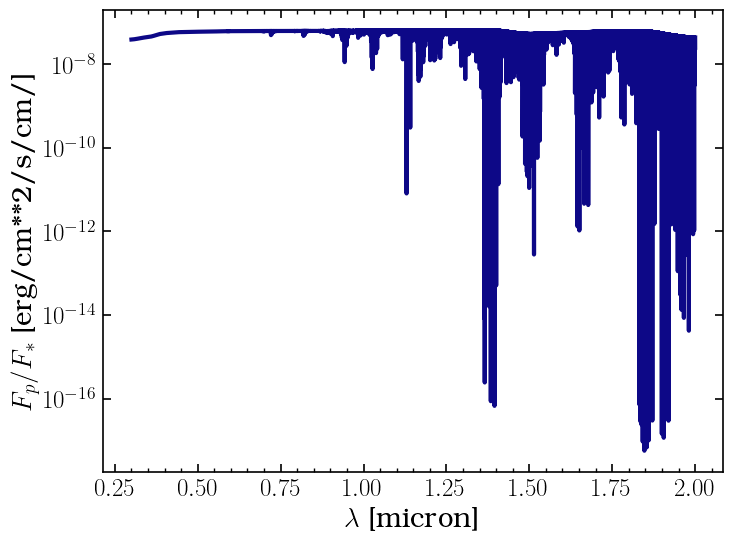

In [40]:
plt.semilogy(model.wavelength, model.fpfs)
plt.xlabel('$\\lambda$ [{}]'.format(model.wavelength.units))
plt.ylabel('$F_p / F_*$ [{}]'.format(model.fpfs.units))

They also contain a set of attributes outlining every parameter used to generate the model, accessed via .attrs

In [25]:
model.attrs

{'ReflectX.Model': ' ReflectX Gas Giant Planet Reflected Light PICASO model spectra  for a world with r=0.8, m=0.3 with 3000K/0.2Rsun/logg5.0 star at 0.6 au  Spectra are R=60,000; to get a different gridding use picaso.justdoit.mean_regrid  Column [0] is wavelength in microns; columns labeled  "fpfs" are the planet/star flux ratio spectrum, columns labeled "PlanetFlux" are the planet spectrum only All flux in units of ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$  Created 2025-11-04 by Logan Pearce',
 'modeltype': 'GasGiant',
 'wavelength.range': '[0.3, 2]',
 'star.teff': '3000',
 'star.radius': '0.2',
 'star.radius.unit': 'Rsun',
 'star.logg': '5.0',
 'star.metallicity': '1',
 'star.star.model.database': 'phoenix',
 'star.mass': '0.16',
 'planet.custom.pt.profile.dataframe': 'none',
 'planet.gravity': 'none',
 'planet.gravity.unit': 'm/(s**2)',
 'planet.radius': 0.8,
 'planet.radius.unit': 'Rjup',
 'planet.mass': 0.3,
 'planet.mass.unit': 'Mjup',
 'planet.tint': '100',
 'planet.separation': 0.604

Text(0.1, 0.1, 'T_eq = 150 K \n Sep = 0.6 au \n Phase = 90 deg \n f_sed = 0.1 \n Kzz = 1e+09')

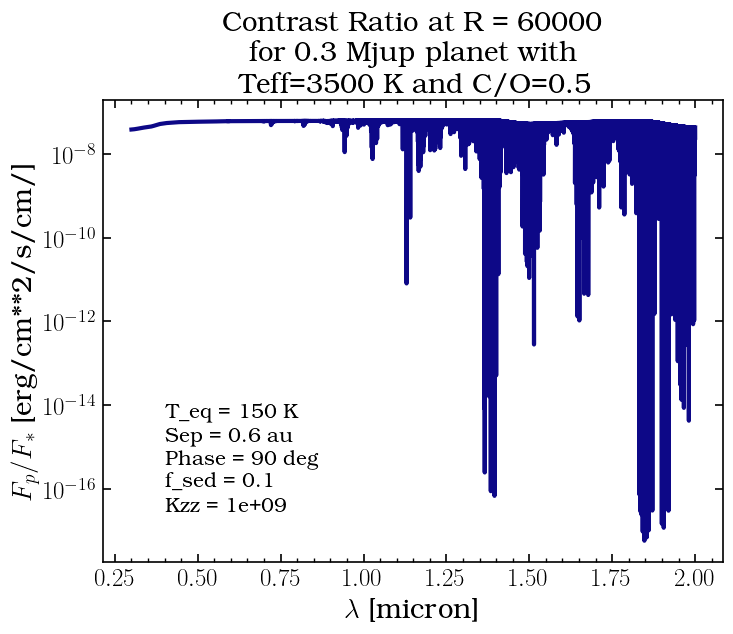

In [49]:
plt.semilogy(model.wavelength, model.fpfs)
plt.xlabel('$\\lambda$ [{}]'.format(model.wavelength.units))
plt.ylabel('$F_p / F_*$ [{}]'.format(model.fpfs.units))
plt.title('Contrast Ratio at R = {} \n for {} Mjup planet with \n Teff={} K and C/O={}'.format(model.attrs['spectral.resolution'],
                                                                                          model.attrs['planet.mass'],
                                                                                         model.attrs['star.teff'],
                                                                                         model.attrs['planet.ctoo']))
plt.annotate('T_eq = {0} K \n Sep = {1:.1f} {2} \n Phase = {3} deg \n f_sed = {4} \n Kzz = {5}'.format(
    model.attrs['planet.teq'], 
    model.attrs['planet.separation'], 
    model.attrs['planet.separation.unit'],
    model.attrs['phase'],
    model.attrs['fsed'],
    model.attrs['kzz']
),
            xy = (0.1,0.1), xycoords='axes fraction', va='bottom', fontsize=15)

## Loading the full model set allows easy comparison among properties

In [3]:
path = '/Volumes/Oy/' # Path to the location of the "ReflectX" folder:
Teff = 3500
planet = 'Saturn'
CtoO = 0.5
model = LoadModel(path, Teff, planet, CtoO)

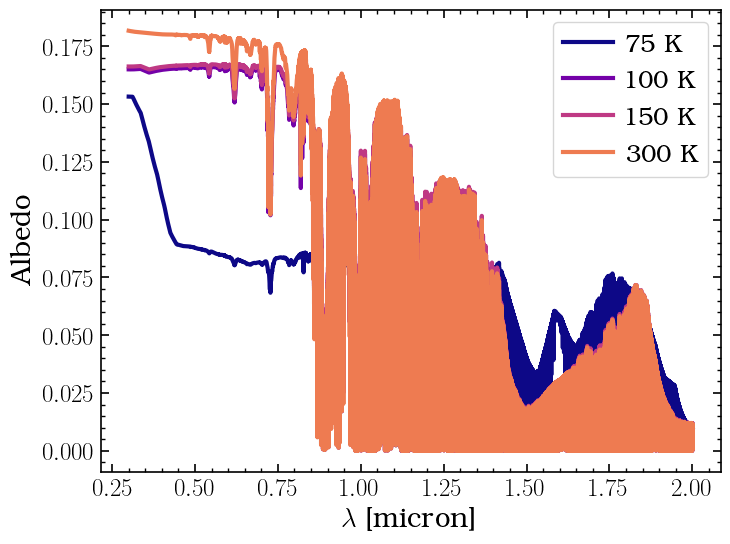

In [6]:
teqs = [75, 100, 150, 300]
phase = 90
fsed = 1
kzz = 1e9

fig,ax = plt.subplots()
for teq in teqs:
    key = 'teq{}/phase{}/fsed{}/kzz{:.0e}'.format(teq,phase,fsed,kzz)
    m = model[key]
    ax.plot(m.wavelength, m.albedo, label='{} K'.format(teq))
ax.set_xlabel('$\\lambda$ [{}]'.format(m.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()

Yuck that's hard to look at.  You can regrid the spectrum onto a lower resolution to make comparison easier.

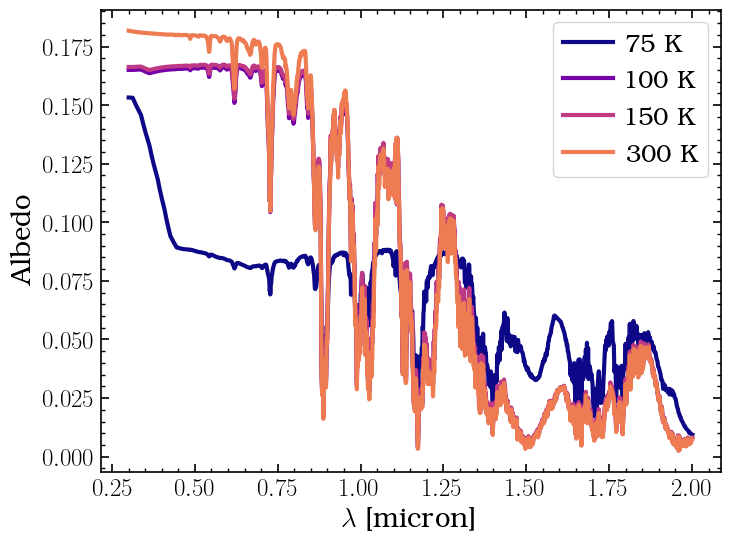

In [14]:

fig,ax = plt.subplots()
for teq in teqs:
    key = 'teq{}/phase{}/fsed{}/kzz{:.0e}'.format(teq,phase,fsed,kzz)
    m = model[key]
    wav,alb = MeanRegrid(m.wavelength, m.albedo, R = 1000)
    ax.plot(wav, alb, label='{} K'.format(teq))
ax.set_xlabel('$\\lambda$ [{}]'.format(m.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()

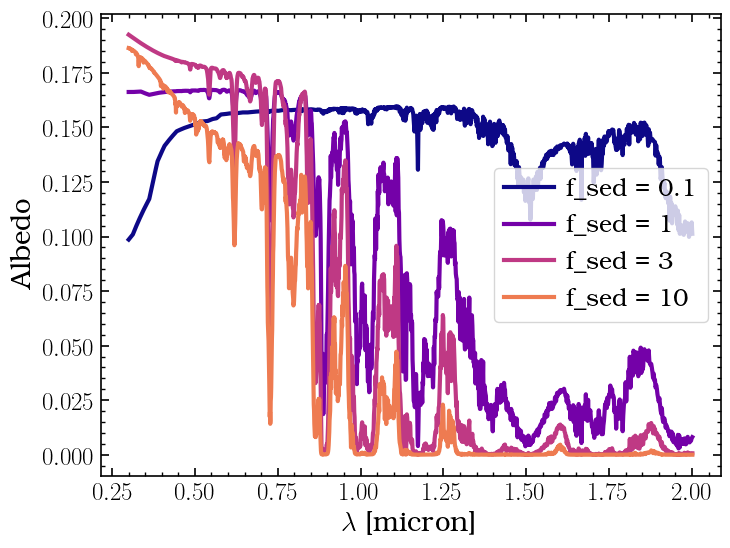

In [19]:
teq = 150
phase = 90
fseds = [0.1,1,3,10]
kzz = 1e9

fig,ax = plt.subplots()
for fsed in fseds:
    key = 'teq{}/phase{}/fsed{}/kzz{:.0e}'.format(teq,phase,str(fsed).replace('.',''),kzz)
    m = model[key]
    wav,alb = MeanRegrid(m.wavelength, m.albedo, R = 1000)
    ax.plot(wav, alb, label='f_sed = {}'.format(fsed))
ax.set_xlabel('$\\lambda$ [{}]'.format(m.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()

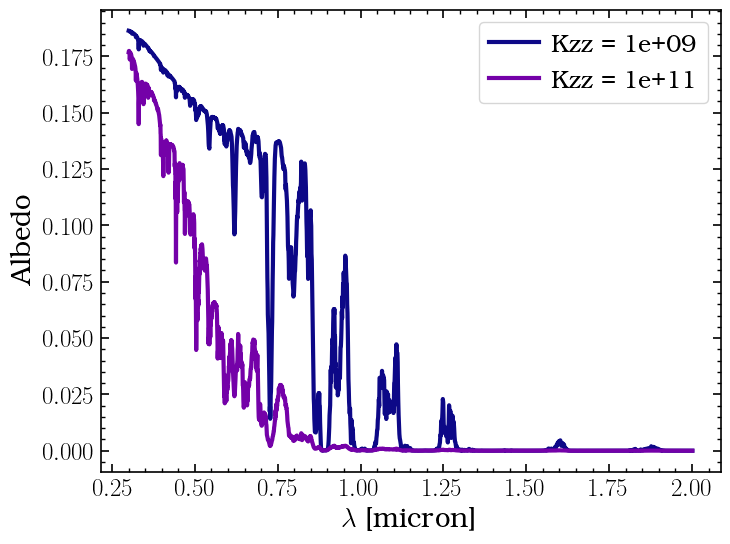

In [18]:
teq = 150
phase = 90
fseds = 1
kzzs = [1e9,1e11]

fig,ax = plt.subplots()
for kzz in kzzs:
    key = 'teq{}/phase{}/fsed{}/kzz{:.0e}'.format(teq,phase,fsed,kzz)
    m = model[key]
    wav,alb = MeanRegrid(m.wavelength, m.albedo, R = 1000)
    ax.plot(wav, alb, label='Kzz = {:.0e}'.format(kzz))
ax.set_xlabel('$\\lambda$ [{}]'.format(m.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()

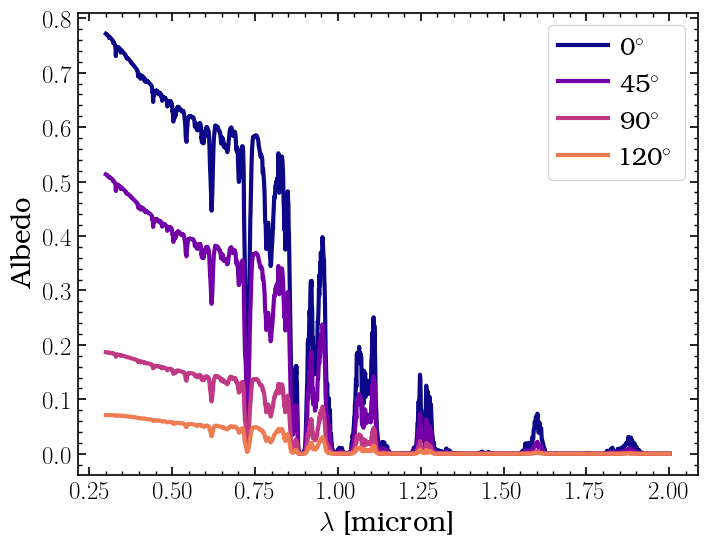

In [22]:
teq = 150
phases = [0,45,90,120]
fseds = 1
kzz = 1e9

fig,ax = plt.subplots()
for phase in phases:
    key = 'teq{}/phase{}/fsed{}/kzz{:.0e}'.format(teq,phase,str(fsed).replace('.',''),kzz)
    m = model[key]
    wav,alb = MeanRegrid(m.wavelength, m.albedo, R = 1000)
    ax.plot(wav, alb, label='{}$^\\circ$'.format(phase))
ax.set_xlabel('$\\lambda$ [{}]'.format(m.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()

## Loading single XArrays allows comparison across star/planet types

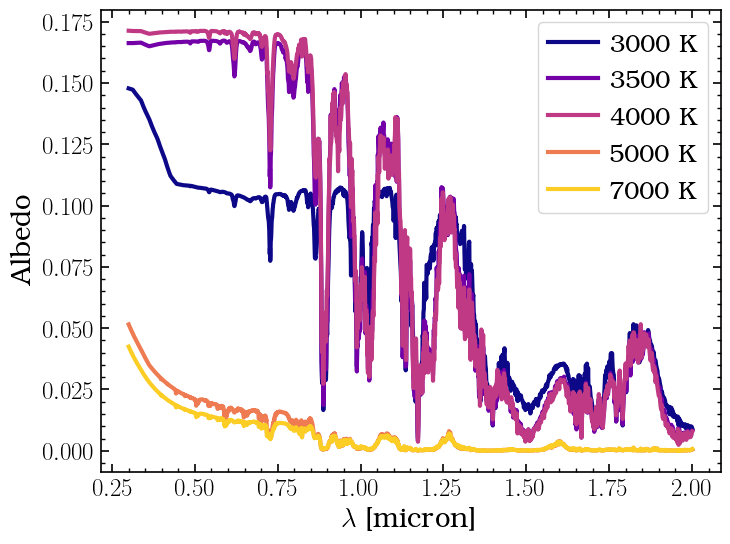

In [4]:
path = '/Volumes/Oy/'
Teffs = [3000, 3500, 4000, 5000, 7000]
planet = 'Saturn'
CtoO = 0.5

fig,ax = plt.subplots()
for Teff in Teffs:
    model = LoadModel(path, Teff, planet, CtoO, teq = 150, phase = 90, clouds = {'fsed':1, 'kzz':1e9})
    wav,alb = MeanRegrid(model.wavelength, model.albedo, R = 1000)
    ax.plot(wav, alb, label='{} K'.format(Teff))
ax.set_xlabel('$\\lambda$ [{}]'.format(model.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()

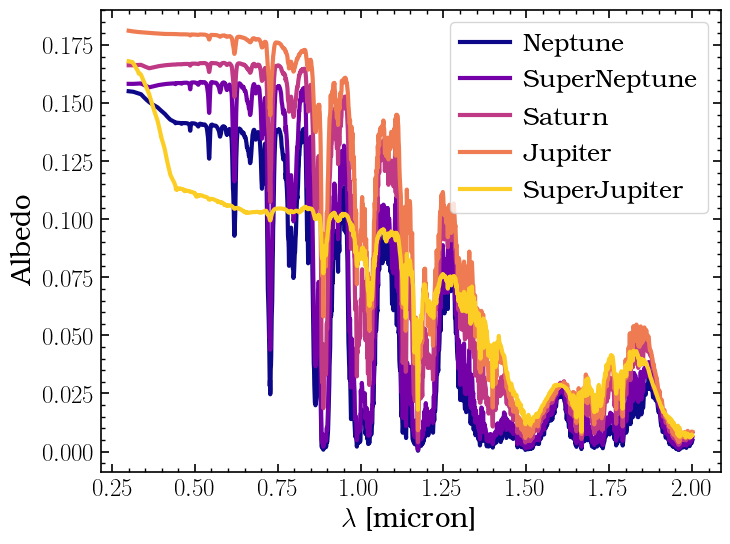

In [7]:
path = '/Volumes/Oy/'
Teff = 3500
planets = ['Neptune','SuperNeptune','Saturn','Jupiter','SuperJupiter']
CtoO = 0.5

fig,ax = plt.subplots()
for planet in planets:
    model = LoadModel(path, Teff, planet, CtoO, teq = 150, phase = 90, clouds = {'fsed':1, 'kzz':1e9})
    wav,alb = MeanRegrid(model.wavelength, model.albedo, R = 1000)
    ax.plot(wav, alb, label='{}'.format(planet))
ax.set_xlabel('$\\lambda$ [{}]'.format(model.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()

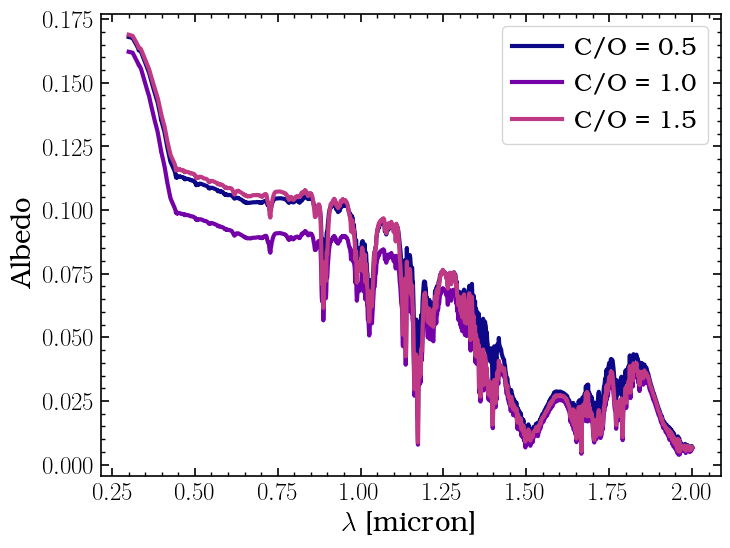

In [9]:
path = '/Volumes/Oy/'
Teff = 3500
planets = 'Saturn'
CtoOs = [0.5,1.0,1.5]

fig,ax = plt.subplots()
for CtoO in CtoOs:
    model = LoadModel(path, Teff, planet, CtoO, teq = 150, phase = 90, clouds = {'fsed':1, 'kzz':1e9})
    wav,alb = MeanRegrid(model.wavelength, model.albedo, R = 1000)
    ax.plot(wav, alb, label='C/O = {}'.format(CtoO))
ax.set_xlabel('$\\lambda$ [{}]'.format(model.wavelength.units))
ax.set_ylabel('Albedo')
plt.legend()